In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import time
import os.path
from multiprocessing import Pool
import multiprocessing as mp
from sympy import Matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_train = pd.read_csv('/content/gdrive/MyDrive/MNIST ML/mnist_train.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/MNIST ML/mnist_test.csv') 

In [ ]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#X_train = np.array(df_train.iloc[:, 1:], dtype=np.int32)
#Y_train = np.array(df_train.iloc[:, :1], dtype=np.int8)

#X_test = np.array(df_test.iloc[:, 1:], dtype=np.int32)
#Y_test = np.array(df_test.iloc[:, :1], dtype=np.int8)

In [ ]:
X_train = np.array(df_train.iloc[:, 1:], dtype=np.float32)/255
Y_train = np.array(df_train.iloc[:, :1], dtype=np.int8)

X_test = np.array(df_test.iloc[:, 1:], dtype=np.float32)/255
Y_test = np.array(df_test.iloc[:, :1], dtype=np.int8)

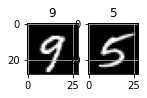

In [ ]:
plt.figure(figsize=(2,1.6))
img = X_train[45]
img = img.reshape((28,28))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title(df_train.iloc[45,0])
plt.grid()

img1 = X_test[52]
img1 = img1.reshape((28,28))
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title(df_test.iloc[52,0])
plt.grid()

plt.show()

In [ ]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [ ]:
def permutation(x, y, mode = 1):
    if mode == 1:
        assert len(x) == len(y)
        i = np.random.permutation(len(y))
        if x.dtype == np.float32:
            return np.array(x[i], dtype=np.float32), np.array(y[i], dtype=np.int8), i
        else:
            return np.array(x[i], dtype=np.int32), np.array(y[i], dtype=np.int8), i
    if mode == 2:
        return np.array(x[y], dtype=np.int8)

In [ ]:
def poly_k_sym (x, p = 4, write = False): # build symmetric matrix
    M = np.zeros((x.shape[0], x.shape[0]), dtype=np.float32) # matrix initialization
    start_time = time.time()
    for i in range(x.shape[0]): # it is built one column at a time
        for j in range(i+1): # simmetrically
            M[j,i] = (1 + np.dot(x[i], x[j])) ** p # computation
            assert M[j,i] >= 0
        if ((i % (x.shape[0] / 4) == 0) and i != 0): # stamp time
            print("Matrix computation -> Row:", i, "in", time.time() - start_time, "seconds.")
    print("Matrix computed in:", time.time() - start_time, "seconds.", "\n") # end matrix stamp time
    if write == True: # save the matrix
        print("Writing the matrix on csv file.")
        np.savetxt('outfile_sym.csv', M)
    return M

In [ ]:
def poly_k_pred (x, x_train, p = 4, write = False): # not symmetric building, check for symmetry
    M = np.zeros((x_train.shape[0], x.shape[0]), dtype=np.float32)
    start_time = time.time()
    for i in range(x_train.shape[0]):
        for j in range(x.shape[0]):
            M[i,j] = (1 + np.dot(x_train[i], x[j])) ** p
            assert M[i,j] >= 0   
        if ((i % (x_train.shape[0] / 4) == 0) and i != 0): 
            print("Matrix computation -> Row:", i, "in", time.time() - start_time, "seconds.")
    print("Matrix computed in:", time.time() - start_time, "seconds.", "\n")
    if write == True:
        print("Writing the matrix on txt file.")
        np.savetxt('outfile.txt', M)
    #if check_symmetric(M) == True:
    #    print("The matrix is symmetric")  
    return M

In [ ]:
def Kpredict(x, x_train, y_train, S, poly, read = False, write = False, writePred = True, zero_one_loss = False, y_test = np.empty(1), debug = False): #WIP!!!!!!!
    
    # zero one loss check
    if zero_one_loss == True:
        assert x.shape[0] == y_test.shape[0]
    
    # definition of variables
    y_p = np.zeros((x.shape[0], 10), dtype=np.int8)
    label = np.zeros((y_train.shape[0], 10), dtype=np.int8)
    for digit in range(10):
        label[:,digit] = np.array([1 if v == digit else -1 for v in y_train], dtype=np.int8)
    
    # write or read matrix
    if x.shape[0] > 10000:
        print("X is too big, writing or reading such big matrix could lead to issues. \nComputing matrix...")
        K = poly_k_pred(x, x_train, poly, False)
    else:
        if read == False and write == False:
            print("Computing matrix...")
            K = poly_k_pred(x, x_train, poly, False)
        if read == False and write == True:
            print("Computing matrix... And writing it once completed.")
            K = poly_k_pred(x, x_train, poly, True)
        if read == True:
            if os.path.isfile('outfile_sym.csv'):
                K = np.loadtxt('outfile_sym.csv')
            else: 
                print("File not found. Computing matrix...")
                K = poly_k_pred(x, x_train, poly, True)
    

    print("Starting predictions computation.")
    start_time = time.time()
    pred = np.zeros(x.shape[0], dtype=np.int8)

    for i in range(x.shape[0]): # for each observation
        for digit in range(10): # check if could be each digit
            y_hat = np.sum(K[:,i] * S[:,digit] * label[:,digit])  # prediction
            y_p[i,digit] = np.sign(y_hat)

            if debug == True and (i % (x.shape[0] / 4) == 0):
                print("obs:", i, "digit-try:", digit, "result:", y_hat, "label:", y_test[i])
            if debug == True and i == x.shape[0] - 1:
                print("digit:", digit, "positive label array:", np.sum(label[:,digit] > 0))
            if ((i % (x.shape[0] / 4) == 0) and i != 0 and digit == 9): # time stamp
                print("Prediction computation -> Observation:", i, "in", time.time() - start_time, "seconds.")
              
        pred[i] = np.argmax(y_p[i])
    print("Total time:", time.time() - start_time, "seconds.\n")

    # saving prediction in txt file 
    if writePred == True:
        print("Writing predictions on txt file.")
        np.savetxt('outpredictions.txt', pred)
    
    # zero one loss
    if zero_one_loss == True:
        print("Computing zero-one loss.")
        mistakes = np.zeros(x.shape[0], dtype=np.int8)
        for m in range(x.shape[0]):
            if debug == True and (m % (x.shape[0] / 4) == 0):
                print("obs", m, "possible labels", y_p[m], "argmax:", pred[m], "label:", y_test[m])
            if pred[m] != y_test[m]:
                mistakes[m] = 1
        error = np.sum(mistakes) / x.shape[0] * 100
        print("Zero One Loss:", error, "%")
    return pred

In [ ]:
def Kperceptron_sym(x, y, e, poly = 4, read = False, write = False, writeWeights = True, debug = False): # uses symmetric matrix
    x, y, order = permutation(x, y, 1) # permutation of x and y simultaneusly
    S = np.zeros((x.shape[0], 10), dtype=np.int8) # number of mistakes

    # compute the big matrix
    # write only for less than 10k observations
    if x.shape[0] > 10000 and (write == True or read == True):
        print("X is too big, writing or reading such big matrix could lead to issues. \nComputing matrix...")
        K = poly_k_sym(x, poly, False)
    else:
        if read == False and write == False:
            print("Computing matrix...")
            K = poly_k_sym(x, poly, False)
        if read == False and write == True:
            print("Computing matrix... And writing it once completed.")
            K = poly_k_sym(x, poly, True)
        if read == True:
            # read if it exists
            if os.path.isfile('outfile_sym.csv'):
                K = np.loadtxt('outfile_sym.csv')
            else: 
                # compute the matrix if it doesn't exists
                print("File not found. Computing matrix...")
                K = poly_k_sym(x, poly, True)
          
    # compute a matrix with 1 or -1 for each digit
    # 1 if it could be that digit, -1 if it can't be that one
    y_p = np.zeros((x.shape[0], 10), dtype=np.int8)

    # run for each digit
    for digit in range(10):
        print("START -> digit:", digit, "\n")
        # one hot encoding for each digit
        label = np.array([1 if v == digit else -1 for v in y], dtype=np.int8)

        # run n epochs for each digit
        for t in range(e):
            print("Epoch:", t)
            start_time = time.time()
            for i in range(x.shape[0]):
                y_hat = np.sum(np.append(K[:,i][:i], K[i,:][i:]) * S[:,digit] * label) # compute prediction for each obs
                y_p[i,digit] = np.sign(y_hat) # only positive or negative matters
                
                # if computation and label are not both negative or positive than add a mistake
                if (label[i] != y_p[i,digit]):
                    S[i,digit] += 1
                    if debug == True:
                        print("Add 1 to S.")

                if debug == True and (t == 0 or t == 1 or t == e - 1 or t == e): # DEBUG!
                    print(Matrix(np.append(K[:,i][:i], K[i,:][i:])), "\n", Matrix(S[:,digit]), "\n", y_hat, y_p[i,digit], label[i], y[i], "\n" )

            # Debug epoch timestamp
            if debug == False:
                print("Number of non-zero in S =", np.count_nonzero(S[:,digit]))
                print("Number of elements taken:", np.sum(S[:,digit]))
                print("Time:", time.time() - start_time, "seconds.\n")

        # Permute back S
        if debug == True:
            print("Pre-permutation", S[:,digit])
        S[:,digit] = permutation(S[:,digit], order, 2)
        if debug == True:
            print("Post-permutation", S[:,digit])
        print("Training of Kernel Perceptron -> digit:", digit, "Complete!\n")
    
    # Stamp weights
    if writeWeights == True:
        print("Writing weights...")
        np.savetxt('outweights_all.txt', S)
        print("Done.")
    
    # 0-1 Loss
    print("Computing zero-one loss.")
    pred = np.zeros(y.shape[0], dtype=np.int8)
    mistakes = np.zeros(y.shape[0], dtype=np.int8)
    for m in range(x.shape[0]):
        pred[m] = np.argmax(y_p[m])
        if debug == True and (m % (x.shape[0] / 4) == 0):
            print("obs", m, "possible labels", y_p[m], "argmax:", pred[m], "label:", y[m])
        if pred[m] != y[m]:
            mistakes[m] = 1
    error = np.sum(mistakes) / x.shape[0] * 100
    print("Zero One Loss:", error, "%")

    # return
    if debug == True:
        return Matrix(S), Matrix(K), np.append(K[:,i//2][:i//2], K[i//2,:][i//2:]), label, y
    else:
        return S 

In [ ]:
a = np.array(([1,1,0],[2,1,3],[4,0,0]))
b = np.array(([3,2,1],[2,0,3],[0,0,1]))
c = np.zeros((a.shape[0],a.shape[0]))
d = np.zeros((a.shape[0],a.shape[0]))
for i in range(a.shape[0]):
        for j in range(a.shape[0]):
            c[i,j] = (1 + np.dot(a[i], a[j])) ** 4
            d[i,j] = (1 + np.transpose(a[i]) @ a[j]) ** 4
(1 + np.dot(a[0], a[0])) ** 4, (1 + np.dot(a[0], a[1])) ** 4, (1 + np.dot(a[0], a[2])) ** 4, (1 + np.dot(a[1], a[0])) ** 4, Matrix(c), a.shape, Matrix(d)

(81, 256, 625, 256, Matrix([
 [ 81.0,   256.0,   625.0],
 [256.0, 50625.0,  6561.0],
 [625.0,  6561.0, 83521.0]]), (3, 3), Matrix([
 [ 81.0,   256.0,   625.0],
 [256.0, 50625.0,  6561.0],
 [625.0,  6561.0, 83521.0]]))

In [ ]:
debug = Kperceptron_sym(X_train[:15], Y_train[:15], 10, 6, False, False, True, True)
debug

Computing matrix...
Matrix computed in: 0.0034461021423339844 seconds. 

START -> digit: 0 

Epoch: 0
Add 1 to S.
Matrix([[6.01774e+10], [1.13746e+9], [3.67669e+9], [8.95777e+7], [1.15520e+9], [6.84502e+6], [891178.], [2.34813e+9], [1.11264e+10], [1.34498e+9], [3.85682e+7], [4.17592e+8], [1.76393e+9], [2.38051e+9], [1.08586e+8]]) 
 Matrix([[1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]) 
 0.0 0 -1 [1] 

Matrix([[1.13746e+9], [6.20310e+11], [8.93724e+7], [2.69764e+10], [4.09283e+9], [60465.8], [2.56689e+7], [2.09833e+10], [4.96213e+10], [7.87133e+8], [2.87330e+8], [6.91603e+9], [1.38541e+11], [1.29913e+8], [9.74987e+8]]) 
 Matrix([[1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]) 
 -1137460900.0 -1 -1 [5] 

Matrix([[3.67669e+9], [8.93724e+7], [2.44232e+9], [7.33592e+6], [7.44446e+7], [708295.], [7503.69], [1.76651e+8], [6.41825e+8], [4.34382e+8], [3.69651e+6], [5.99499e+7], [1.00323e+8], [9.38824e+8], [1.28818e+7]]) 
 Matrix([[1], [0

(Matrix([
 [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 1]]), Matrix([
 [6.01774e+10, 1.13746e+9, 3.67669e+9,  8.95777e+7,   1.1552e+9,  6.84502e+6,    891178.0,  2.34813e+9, 1.11264e+10,  1.34498e+9,  3.85682e+7,  4.17592e+8,  1.76393e+9, 2.38051e+9, 1.08586e+8],
 [        0.0, 6.2031e+11, 8.93724e+7, 2.69764e+10,  4.09283e+9,     60465.8,  2.56689e+7, 2.09833e+10, 4.96213e+10,  7.87133e+8,   2.8733e+8,  6.91603e+9, 1.38541e+11, 1.29913e+8, 9.74987e+8],
 [        0.0,        0.0, 2.44232e+9,  7.33592e+6,  7.44446e+7,    708295.0,     7503.69,  1.76

In [ ]:
mistakes = Kperceptron_sym(X_train[:10000], Y_train[:10000], 10, 4, False, False, True)

Computing matrix...
Matrix computation -> Row: 2500 in 27.119290590286255 seconds.
Matrix computation -> Row: 5000 in 107.86759781837463 seconds.
Matrix computation -> Row: 7500 in 239.22568678855896 seconds.
Matrix computed in: 418.70498275756836 seconds. 

START -> digit: 0 

Epoch: 0
Number of non-zero in S = 149
Number of elements taken: 149
Time: 1.1939067840576172 seconds.

Epoch: 1
Number of non-zero in S = 177
Number of elements taken: 182
Time: 1.190246343612671 seconds.

Epoch: 2
Number of non-zero in S = 180
Number of elements taken: 187
Time: 1.2194156646728516 seconds.

Epoch: 3
Number of non-zero in S = 180
Number of elements taken: 187
Time: 1.208507776260376 seconds.

Epoch: 4
Number of non-zero in S = 180
Number of elements taken: 187
Time: 1.196923017501831 seconds.

Epoch: 5
Number of non-zero in S = 180
Number of elements taken: 187
Time: 1.1934850215911865 seconds.

Epoch: 6
Number of non-zero in S = 180
Number of elements taken: 187
Time: 1.185218334197998 seconds

In [ ]:
y_pred = Kpredict(X_test[:1000], X_train[:10000], Y_train[:10000], mistakes, 4, read = False, write = False, writePred = True, zero_one_loss = True, y_test = Y_test[:1000], debug = True)

Computing matrix...
Matrix computation -> Row: 2500 in 19.07633662223816 seconds.
Matrix computation -> Row: 5000 in 38.37703347206116 seconds.
Matrix computation -> Row: 7500 in 57.63167905807495 seconds.
Matrix computed in: 76.4673261642456 seconds. 

Starting predictions computation.
obs: 0 digit-try: 0 result: -203118780.0 label: [7]
obs: 0 digit-try: 1 result: -192792100.0 label: [7]
obs: 0 digit-try: 2 result: -352529180.0 label: [7]
obs: 0 digit-try: 3 result: -476954140.0 label: [7]
obs: 0 digit-try: 4 result: -335653920.0 label: [7]
obs: 0 digit-try: 5 result: -325264130.0 label: [7]
obs: 0 digit-try: 6 result: -240548060.0 label: [7]
obs: 0 digit-try: 7 result: -84655656.0 label: [7]
obs: 0 digit-try: 8 result: -527020350.0 label: [7]
obs: 0 digit-try: 9 result: -471728200.0 label: [7]
obs: 250 digit-try: 0 result: -2581804300.0 label: [4]
obs: 250 digit-try: 1 result: -2758346500.0 label: [4]
obs: 250 digit-try: 2 result: -4746111500.0 label: [4]
obs: 250 digit-try: 3 result

In [ ]:
full = Kperceptron_sym(X_train, Y_train, 10, 4, False, False, True)

Computing matrix...


In [ ]:
S = np.zeros(10000,10)
for e in range(10):
    S[:,e] = Kperceptron_sym(X_train[:10000], Y_train[:10000], 0, e, 6, False, False, True)

In [ ]:
a = np.zeros((10,10))
b = np.zeros((10, 10))
for l in range(10):
  for j in range(l+1):
    a[j,l] = 1
for i in range(10):
    #print(i, a[i,:][:i], a[:,i][i:])
    print(i, a[:,i][:i], a[i,:][i:])
    b[i] = np.transpose(np.append(a[:,i][:i], a[i,:][i:]))
print(a, np.append(a[:,1][:1], a[1,:][1:]).shape)
print(b)

0 [] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 [1.] [1. 1. 1. 1. 1. 1. 1. 1. 1.]
2 [1. 1.] [1. 1. 1. 1. 1. 1. 1. 1.]
3 [1. 1. 1.] [1. 1. 1. 1. 1. 1. 1.]
4 [1. 1. 1. 1.] [1. 1. 1. 1. 1. 1.]
5 [1. 1. 1. 1. 1.] [1. 1. 1. 1. 1.]
6 [1. 1. 1. 1. 1. 1.] [1. 1. 1. 1.]
7 [1. 1. 1. 1. 1. 1. 1.] [1. 1. 1.]
8 [1. 1. 1. 1. 1. 1. 1. 1.] [1. 1.]
9 [1. 1. 1. 1. 1. 1. 1. 1. 1.] [1.]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] (10,)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 

In [ ]:
a = np.random.permutation(10)
b = [0,1,2,3,4,5,6,7,8,9]
b = np.transpose(np.array((a, b)))
print(b)
c = permutation(b[:,1], a, 2)
print(c)

[[4 0]
 [8 1]
 [7 2]
 [2 3]
 [3 4]
 [5 5]
 [9 6]
 [6 7]
 [0 8]
 [1 9]]
[4 8 7 2 3 5 9 6 0 1]


In [ ]:
M = np.zeros((10,10))
N = np.zeros((10,10))
for i in range(10):
    for j in range(i+1):
        M[j,i] = (1+ np.dot(X_train[i], X_train[j]))

for i in range(10):
    for j in range(i+1):
        N[j,i] = (1+ np.dot(X_train[i], X_train[j])) ** 3

M = M**3
for i in range(10):
    for j in range(i+1):
        if M[j,i] == N[j,i]:
            print("Nice")
        else:
            print("Not Nice")


Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice
Nice


In [ ]:
epochs = [1,2]
M = np.zeros((10,10))
for i in range(10):
    for j in range(i+1):
        M[j,i] = 4
Matrix(M+M)

Matrix([
[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0],
[0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0],
[0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0],
[0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0],
[0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 8.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 8.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0]])

In [ ]:
a, b, order = permutation(X_train[:10], Y_train[:10], 1)
print(b, "\n", Y_train[:10])
print(a.shape[1], X_train.shape[1])
print(order)
for i in range(10):
  if np.array_equal(a[i,:], X_train[1,:]):
    print("Nice")
a = permutation(b, order, 2)
print(b)

[[5]
 [1]
 [9]
 [2]
 [1]
 [1]
 [3]
 [0]
 [4]
 [4]] 
 [[5]
 [0]
 [4]
 [1]
 [9]
 [2]
 [1]
 [3]
 [1]
 [4]]
784 784
[0 3 4 5 8 6 7 1 2 9]
Nice
[[5]
 [1]
 [9]
 [2]
 [1]
 [1]
 [3]
 [0]
 [4]
 [4]]


In [ ]:
def Kperceptron_sym_single(x, y, digit, e, poly = 4, read = False, write = False, writeWeights = True): # uses symmetric matrix
    x, y, order = permutation(x, y , 1)
    y = np.array([1 if v == digit else -1 for v in y], dtype=np.int32)
    S = np.zeros(x.shape[0], dtype=np.int32)
    if x.shape[0] > 10000:
        print("X is too big, writing or reading such big matrix could lead to issues. \nComputing matrix...")
        K = poly_k_sym(x, poly, digit, False)
    else:
        if read == False and write == False:
            print("Computing matrix...")
            K = poly_k_sym(x, digit, poly, False)
        if read == False and write == True:
            print("Computing matrix... And writing it once completed.")
            K = poly_k_sym(x, digit, poly, True)
        if read == True:
            if os.path.isfile('outfile_sym_' + str(digit) + '.csv'):
                K = np.loadtxt('outfile_sym_' + str(digit) + '.csv')
            else: 
                print("File not found. Computing matrix...")
                K = poly_k_sym(x, digit, poly, True)
    for t in range(e):
        start_time = time.time()
        for i in range(x.shape[0]):
            y_hat = np.sum(np.append(K[:,i][:i], K[i,:][i:]) * S * y)
            if y_hat > 0:
                y_hat = 1
            else:
                y_hat = -1
            if (y[i] != y_hat):
                S[i] += 1
        print("Epoch:", t)
        print("Number of non-zero in S =", np.count_nonzero(S))
        print("Number of elements taken:", np.sum(S))
        print("Time:", time.time() - start_time, "seconds.\n")
    S = permutation(S, order, 2)
    if writeWeights == True:
        np.savetxt('outweights_' + str(digit) + '.txt', S)
    print("Training of Kernel Perceptron -> digit:", digit)
    return S 

In [ ]:
def Kpredict_single(x, x_train, y_train, S, digit, poly, read = False, write = False, writePred = True, zero_one_loss = False, y_test = np.empty(1)):
    if zero_one_loss == True:
        assert x.shape[0] == y_test.shape[0]
    y_p = np.zeros(x.shape[0], dtype=np.int32)
    y_train = np.array([1 if v == digit else -1 for v in y_train], dtype=np.int32)
    if x.shape[0] > 10000:
        print("X is too big, writing or reading such big matrix could lead to issues. \nComputing matrix...")
        K = poly_k(x, x_train, poly, digit, False)
    else:
        if read == False and write == False:
            print("Computing matrix...")
            K = poly_k(x, x_train, digit, poly, False)
        if read == False and write == True:
            print("Computing matrix... And writing it once completed.")
            K = poly_k(x, x_train, digit, poly, True)
        if read == True:
            if os.path.isfile('outfile_sym_' + str(digit) + '.csv'):
                K = np.loadtxt('outfile_sym_' + str(digit) + '.csv')
            else: 
                print("File not found. Computing matrix...")
                K = poly_k(x, x_train, digit, poly, True)
    print("Starting predictions computation.")
    start_time = time.time()
    for i in range(x.shape[0]):
        y_hat = np.sum(K[:,i] * S * y_train)
        if ((i % (x.shape[0] / 4) == 0) and i != 0): 
            print("Prediction computation -> Observation:", i, "in", time.time() - start_time, "seconds.")
        if y_hat > 0:
            y_p[i] = 1
        else:
            y_p[i] = -1
    print("Total time:", time.time() - start_time, "seconds.\n")
    if writePred == True:
        print("Writing predictions on txt file.")
        np.savetxt('outpredictions_' + str(digit) + '.txt', S)
    if zero_one_loss == True:
        print("Computing zero-one loss.")
        y_test = np.array([1 if v == digit else -1 for v in y_test], dtype=np.int32)
        start_time = time.time()
        mistakes = np.zeros(x.shape[0], dtype=np.int32)
        for m in range(x.shape[0]):
            #if ((m % (x.shape[0] / 4) == 0) and i != 0): 
                #print("Zero-one loss computation -> Observation:", m, "in", time.time() - start_time, "seconds.")
            if y_p[m] != y_test[m]:
                mistakes[m] = 1
        error = np.sum(mistakes) / x.shape[0] * 100
        print("Zero One Loss:", error, "%")
    print("Predictions of Kernel Perceptron -> digit:", digit)
    return y_p

In [ ]:
def poly_k(x, p = 4, write = False): # not symmetric building, check for symmetry
    M = np.zeros((x.shape[0], x.shape[0]), dtype=np.float32)
    start_time = time.time()
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            M[i,j] = (1 + np.dot(x[i], x[j])) ** p   
        if ((i % (x.shape[0] / 4) == 0) and i != 0): 
            print("Matrix computation -> Row:", i, "in", time.time() - start_time, "seconds.")
    print("Matrix computed in:", time.time() - start_time, "seconds.", "\n")
    if write == True:
        print("Writing the matrix on txt file.")
        np.savetxt('outfile.txt', M)
    #if check_symmetric(M) == True:
    #    print("The matrix is symmetric")  
    return M

In [ ]:
#PARALLELIZATION
def single_process_matrix(x, p, indexes):
    M = np.zeros((x.shape[0], x.shape[0]), dtype=np.float32)
    for i in range(indexes[0], indexes[1]):
        for j in range(i+1):
            M[i,j] = (1 + np.dot(x[i], x[j])) ** p
    return M

def poly_k_parallel (x, number, p = 6, write = False): # build symmetric matrix
    start_time = time.time()
    cpu_count = mp.cpu_count()
    pool = Pool(cpu_count)
    rows_single_process = (x.shape[0]//cpu_count)
    l_args = [(l * rows_single_process, l * rows_single_process + rows_single_process) for l in range(cpu_count)]
    results = pool.starmap(single_process_matrix, [(x, p, indexes) for indexes in l_args])

    M = sum(results)
    
    print("Matrix computed in:", time.time() - start_time, "seconds.", "\n")

    if write == True:
        print("Writing the matrix on txt file.")
        np.savetxt('outfile_par_' + str(number) + '.txt', M)
    
    return M

In [ ]:
def Kperceptron_par(x, y, digit, e, poly = 6, read = False, write = False, writeWeights = True): # uses symmetric matrix
    y = np.array([1 if v == digit else -1 for v in y], dtype=np.int32)
    S = np.zeros(x.shape[0], dtype=np.int32)
    if x.shape[0] > 10000:
        print("X is too big, writing or reading such big matrix could lead to issues. \nComputing matrix...")
        K = poly_k_parallel(x, poly, digit, False)
    else:
        if read == False and write == False:
            print("Computing matrix...")
            K = poly_k_parallel(x, digit, poly, False)
        if read == False and write == True:
            print("Computing matrix... And writing it once completed.")
            K = poly_k_parallel(x, digit, poly, True)
        if read == True:
            if os.path.isfile('outfile' + str(digit) + '.txt'):
                K = np.loadtxt('outfile' + str(digit) + '.txt')
            else: 
                print("File not found. Computing matrix...")
                K = poly_k_parallel(x, digit, poly, True)
    for t in range(e):
        for i in range(x.shape[0]):
            y_hat = np.sum(np.append(K[i,:][:i], K[:,i][i:]) * S * y)
            if y_hat > 0:
                y_hat = 1
            else:
                y_hat = -1
            if (y[i] != y_hat):
                S[i] += 1
        print("-------------------------------------------------")
        print("Epoch:", t)
        print("Number of non-zero in S =", np.count_nonzero(S))
        print("Number of elements taken:", np.sum(S))
        print("-------------------------------------------------", "\n")
    if writeWeights == True:
        np.savetxt('outweights' + str(digit) + '.txt', S)
    print("Training of Kernel Perceptron -> digit:", digit)
    return S 

In [ ]:
partry = Kperceptron_par(X_train[:1000], Y_train[:1000], 0, 10, 6, False, True, True)

Computing matrix... And writing it once completed.
Matrix computed in: 3.152876138687134 seconds. 

Writing the matrix on txt file.
-------------------------------------------------
Epoch: 0
Number of non-zero in S = 494
Number of elements taken: 494
------------------------------------------------- 

-------------------------------------------------
Epoch: 1
Number of non-zero in S = 576
Number of elements taken: 1050
------------------------------------------------- 

-------------------------------------------------
Epoch: 2
Number of non-zero in S = 602
Number of elements taken: 1625
------------------------------------------------- 

-------------------------------------------------
Epoch: 3
Number of non-zero in S = 614
Number of elements taken: 2208
------------------------------------------------- 

-------------------------------------------------
Epoch: 4
Number of non-zero in S = 622
Number of elements taken: 2798
------------------------------------------------- 

---------

In [ ]:
def Kperceptron(x, y, digit, e, poly = 6, read = False, write = False, writeWeights = True): # doesn't use symmetric matrix
    y = np.array([1 if v == digit else -1 for v in y], dtype=np.int32)
    S = np.zeros(x.shape[0], dtype=np.int32)
    if x.shape[0] > 10000:
        print("X is too big, writing or reading such big matrix could lead to issues. \nComputing matrix...")
        K = poly_k(x, poly, digit, False)
    else:
        if read == False and write == False:
            print("Computing matrix...")
            K = poly_k(x, digit, poly, False)
        if read == False and write == True:
            print("Computing matrix... And writing it once completed.")
            K = poly_k(x, digit, poly, True)
        if read == True:
            if os.path.isfile('outfile' + str(digit) + '.txt'):
                K = np.loadtxt('outfile' + str(digit) + '.txt')
            else: 
                print("File not found. Computing matrix...")
                K = poly_k(x, digit, poly, True)
    for t in range(e):
        for i in range(x.shape[0]):
            y_hat = np.sum(K[:,i] * S * y)
            if y_hat > 0:
                y_hat = 1
            else:
                y_hat = -1
            if (y[i] != y_hat):
                S[i] += 1
        print("-------------------------------------------------")
        print("Epoch:", t)
        print("Number of non-zero in S =", np.count_nonzero(S))
        print("Number of elements taken:", np.sum(S))
        print("-------------------------------------------------", "\n")
    if writeWeights == True:
        np.savetxt('outweights' + str(digit) + '.txt', S)
    print("Training of Kernel Perceptron -> digit:", digit)
    return S 

In [ ]:
mistakes = Kperceptron(X_train[:1000], Y_train[:1000], 0, 10, 6, False, True, True) # Don't read or write the matrix for too big datasets

Computing matrix... And writing it once completed.
Matrix Computation -> Row: 250 in 0.2108902931213379 seconds.
Matrix Computation -> Row: 500 in 0.848783016204834 seconds.
Matrix Computation -> Row: 750 in 1.8698878288269043 seconds.
Matrix computed in: 3.339146614074707 seconds. 

Writing the matrix on txt file.
-------------------------------------------------
Epoch: 0
Number of non-zero in S = 494
Number of elements taken: 494
------------------------------------------------- 

-------------------------------------------------
Epoch: 1
Number of non-zero in S = 576
Number of elements taken: 1050
------------------------------------------------- 

-------------------------------------------------
Epoch: 2
Number of non-zero in S = 602
Number of elements taken: 1625
------------------------------------------------- 

-------------------------------------------------
Epoch: 3
Number of non-zero in S = 614
Number of elements taken: 2208
------------------------------------------------